<a href="https://colab.research.google.com/github/Jucicarla/APE/blob/main/Atividade_APE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disciplina: Aquisição, Pre-processamento e exploração de dados**

**Discente: Jucicarla Pires Barbosa - jpb.cid20@uea.edu.br**

**Dataset utilizado:** northwind_small.sqlite

Faça um relatório para responder a seguinte questão do negócio:


**Questão de Negócio**

- O 20% dos empregados fatura o 80% por cento das ordens, e conseguem pelo menos o 60 % da receita total da empresa.

- Quais recomendações você faria ao negócio com os resultados da exploração de dados?

**Endendimento do Negócio**
  - Obter o número de orders criado por cada Employee
  - Calcular o porcento que representa da receita total

Pre-processamento

In [110]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
import numpy as np


Carregar os dados

In [111]:
con = sqlite3.connect('/content/drive/MyDrive/northwind_small.sqlite')

In [112]:
#visualisar todas as tabelas do banco
con.execute(""" SELECT name FROM sqlite_master WHERE type='table' ; """).fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [113]:
#verificar o numero de orders criado por cada Employee
str_query = (""" SELECT
              a.EmployeeId,
              b.FirstName, 
              b.LastName,  
              COUNT(a.EmployeeId) as CountOrders
              FROM 'Order' a
              LEFT JOIN Employee b 
              ON b.Id = a.EmployeeId
              GROUP BY EmployeeId

            """  )

In [114]:
df = pd.read_sql_query(str_query, con)

In [115]:
df

,EmployeeId,FirstName,LastName,CountOrders
0,1,Nancy,Davolio,123
1,2,Andrew,Fuller,96
2,3,Janet,Leverling,127
3,4,Margaret,Peacock,156
4,5,Steven,Buchanan,42
5,6,Michael,Suyama,67
6,7,Robert,King,72
7,8,Laura,Callahan,104
8,9,Anne,Dodsworth,43


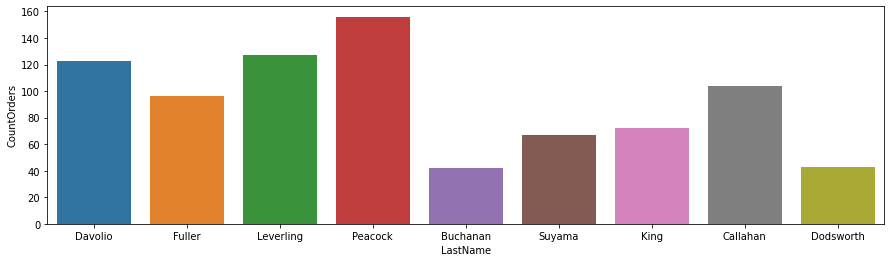

In [116]:
plt.figure(figsize=(15,4))
sns.barplot(x='LastName', y='CountOrders', data=df)

In [117]:
str_query1 = (""" SELECT 
                a.EmployeeId,
                b.LastName,
                od.OrderId,
                od.Quantity,
                od.UnitPrice,
                COUNT(a.EmployeeId) as CountOrders
                FROM 'Order' a
                LEFT JOIN Employee b 
                ON b.Id = a.EmployeeId
                JOIN OrderDetail od ON od.OrderId = a.Id
                GROUP BY EmployeeId
             """ )

In [118]:
df1 = pd.read_sql_query(str_query1,con)

In [119]:
df1

,EmployeeId,LastName,OrderId,Quantity,UnitPrice,CountOrders
0,1,Davolio,11077,1,81.00,345
1,2,Fuller,11073,10,21.00,241
2,3,Leverling,11063,40,18.40,321
3,4,Peacock,11076,20,25.00,420
4,5,Buchanan,11043,10,21.00,117
5,6,Suyama,11045,24,53.00,168
6,7,King,11074,14,17.45,176
7,8,Callahan,11075,10,19.00,260
8,9,Dodsworth,11058,21,34.00,107


In [120]:
#calcular o porcento
total = df1['CountOrders'].sum()
df_sum = df1[['LastName', 'CountOrders']].groupby(['LastName']).sum().reset_index()
df_sum['porcento']=df_sum['CountOrders']/total*100

In [121]:
df_sum

,LastName,CountOrders,porcento
0,Buchanan,117,5.429234
1,Callahan,260,12.064965
2,Davolio,345,16.009281
3,Dodsworth,107,4.965197
4,Fuller,241,11.183295
5,King,176,8.167053
6,Leverling,321,14.895592
7,Peacock,420,19.489559
8,Suyama,168,7.795824


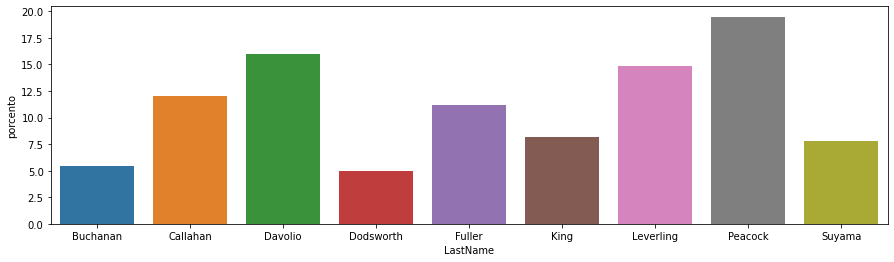

In [122]:
#plotando a porcentagem para cada empregado
plt.figure(figsize=(15,4))
sns.barplot(x='LastName', y='porcento', data=df_sum)

In [123]:
#teste de normalidade
#Usando o Teste de Shapiro
stat, p = shapiro(df1['CountOrders'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#se p> 0.05, rejeita H0, is dados não seguem uma distribuição normal

Statistics=0.951, p=0.696


In [124]:
#tranformação logaritima
df3_log = df.copy()

In [125]:
df3_log['CountOrders2'] = np.log(df['CountOrders'])

In [126]:
df3_log

,EmployeeId,FirstName,LastName,CountOrders,CountOrders2
0,1,Nancy,Davolio,123,4.812184
1,2,Andrew,Fuller,96,4.564348
2,3,Janet,Leverling,127,4.844187
3,4,Margaret,Peacock,156,5.049856
4,5,Steven,Buchanan,42,3.737670
5,6,Michael,Suyama,67,4.204693
6,7,Robert,King,72,4.276666
7,8,Laura,Callahan,104,4.644391
8,9,Anne,Dodsworth,43,3.761200


**Conclusões**
- Os 20% dos empregados fatura 36% porcentos das ordens.
- Conseguem pelo menos 62% da receita total da empresa.

- Há diferenças entre a quantidade de faturas entre os empregados, por isso a existe uma distribuição não normal.

- Northwind poderia estabelecer metas para os empregados para que todos estejam normal no faturamento da empresa